# KNN - Faces

### Neste exercício utilizaremos o conjunto de dados da FEI + duas fotos inéditas
- Faça o download do conjunto de dados: https://fei.edu.br/~cet/frontalimages_manuallyaligned_part1.zip
- Descompacte o conjunto e dados no mesmo diretório deste arquivo
- Copie as duas imagens inéditas para o mesmo diretório deste arquivo

#### Exercício 1: Elaborar um classificador KNN para classificar o conjunto de dados da FEI
- Considere elaborar um conjunto de dados com 20% da amostra destianda par de teste 80% para treinamento
- Encontre o melhor valor de K para o conjunto de dados selecionado

##### Passo 1: Importar as bibliotecas necessárias

In [1]:
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob

##### Passo 2: Criar um conjunto de dados com todas as imagens do diretório

In [2]:
# Criando uma variável para armazenar as imagens
dataset = []

# Criando um laço de repetição para importar cada imagem
for file in glob.glob("frontalimages_manuallyaligned_part1/*.jpg"):
    # Carredando a imagem do índice
    load_file = Image.open(file)
    # Convertendo a imagem e tons de cinza
    load_file = load_file.convert("L")
    # Convertendo o objeto imagem em array
    load_file = np.array(load_file)
    # Converte a imagem em um vetor
    load_file = load_file.flatten()
    # Adicionando a array da na variável dataset
    dataset.append(load_file)

# Convertendo a lista de imagens em array
dataset = np.array(dataset)

# Dimensão do conjunto de dados
dataset.shape

(200, 93600)

Observem que agora cada imagem está armazenada em uma linha

##### Passo 3: Imprimir uma imagem armazenada como vetor

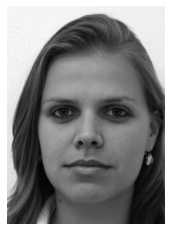

In [3]:
# Obtendo a dimensão da última imagem carregada na etapta anterior
[dim_1, dim_2] = np.array(Image.open(file).convert("L")).shape

# Transformando uma imagem qualquer armazenada em linha para uma matriz 
original = np.resize(dataset[0], (dim_1, dim_2))

# Apresentando uma imagem original
plt.imshow(original, cmap='gray')
plt.axis('off')
plt.show()

##### Passo 4: Organizando o conjunto de dados

Considerando que iremos construir um modelo de aprendizagem supervisionado, ou seja, que utiliza um conjunto de dados que contém exemplos rotulados, então é ncessário identificar a classe de cada imagem. No entanto, observem que a função **glob** lista os arquivos como string e ordena em ordem alfabética.

Neste caso, nós podemos criar uma filtro para ordenar a lista corretamente ou importar cada classe separadamente, conforme solução apresentada a seguir.

In [4]:
# Criando uma variável para armazenar as imagens da classe neutral
dataset_neutral = []

# Criando um laço de repetição para importar cada imagem
for file in glob.glob("frontalimages_manuallyaligned_part1/*a.jpg"):
    # Carrega a imagem do índice, converte em tons de cinza, converte em array, transforma em vetor, adiciona ao dataset
    dataset_neutral.append(np.array(Image.open(file).convert("L")).flatten())

# Convertendo a lista de imagens em array
dataset_neutral = np.array(dataset_neutral)

# Imprime a dimensão do array
print('Dimensão da classe nuetral: ', dataset_neutral.shape)

Dimensão da classe nuetral:  (100, 93600)


In [5]:
# Criando uma variável para armazenar as imagens da classe smiling
dataset_smiling = []

# Criando um laço de repetição para importar cada imagem
for file in glob.glob("frontalimages_manuallyaligned_part1/*b.jpg"):
    # Carrega a imagem do índice, converte em tons de cinza, converte em array, transforma em vetor, adiciona ao dataset
    dataset_smiling.append(np.array(Image.open(file).convert("L")).flatten())

# Convertendo a lista de imagens em array
dataset_smiling = np.array(dataset_smiling)

# Imprime a dimensão do array
print('Dimensão da classe smiling: ', dataset_smiling.shape)

Dimensão da classe smiling:  (100, 93600)


In [6]:
# Concatenando as duas classes
dataset = np.concatenate((dataset_neutral,dataset_smiling))

# Imprime a dimensão do array
print('Dimensão da classe concatenada: ', dataset.shape)

Dimensão da classe concatenada:  (200, 93600)


##### Passo 5: Criando um gabarito

Após organizar as classes é necessário criar uma lista para identificar cada imagem 

In [7]:
# Criando uma lista para identificar as imagens da classe neutral
neutral = np.zeros(dataset_neutral.shape[0])
# Criando uma lista para identificar as imagens da classe smiling
smiling = np.ones(dataset_smiling.shape[0])

# Concatenando o as listas para obter a mesma dimensão do dataset
gabarito = np.concatenate((neutral,smiling))

# Imprimindo a dimensão do array
print('Dimensão do gabarito: ', gabarito.shape)

# Imprimindo o gabarito
print('Gabarito: ')
print(gabarito)

Dimensão do gabarito:  (200,)
Gabarito: 
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


In [8]:
# Importando a função para organizar os conjuntos de dados de treinamento e teste
from sklearn.model_selection import train_test_split

In [9]:
# Organizando os conjuntos de treinamento e teste
# No parâmetro test_size deve ser informado o percentil do conjunto destinado ao teste
X_train, X_test, y_train, y_test = train_test_split(dataset, gabarito, test_size = 0.2, random_state=50) 

In [10]:
# Verifica a dimensão dos conjutnos de treinamento e teste
print('Conunto de dados de treinamento:',X_train.shape)
print('      Conunto de dados de teste:',X_test.shape)
print('        Gabarito do treinamento:',y_train.size)
print('              Gabarito do teste:',y_test.size)

Conunto de dados de treinamento: (160, 93600)
      Conunto de dados de teste: (40, 93600)
        Gabarito do treinamento: 160
              Gabarito do teste: 40


##### Passo 6: Visualizando as imagens da class de treinamento e de teste

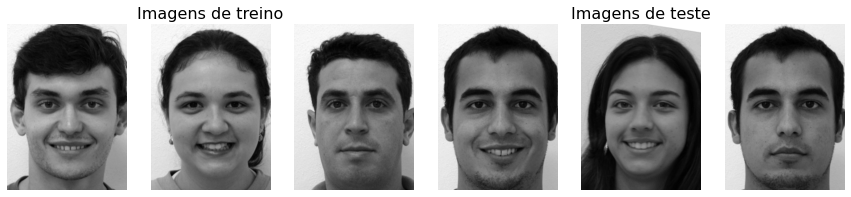

In [11]:
# Transformando uma imagem qualquer armazenada em linha para uma matriz 
train1 = np.resize(X_train[0], (dim_1, dim_2))
train2 = np.resize(X_train[1], (dim_1, dim_2))
train3 = np.resize(X_train[2], (dim_1, dim_2))
test1 = np.resize(X_test[0], (dim_1, dim_2))
test2 = np.resize(X_test[1], (dim_1, dim_2))
test3 = np.resize(X_test[2], (dim_1, dim_2))

# Configurando o tamanho da área de visualização
plt.subplots(figsize=(15, 5))

# Configurando a visualização das amostras do grupo de treinamento 
plt.subplot(1,6,1)
plt.imshow(train1, cmap='gray')
plt.axis('off')

plt.subplot(1,6,2)
plt.imshow(train2, cmap='gray')
plt.title('Imagens de treino', fontsize=16)
plt.axis('off')

plt.subplot(1,6,3)
plt.imshow(train3, cmap='gray')
plt.axis('off')

# Configurando a visualização das amostras do grupo de teste
plt.subplot(1,6,4)
plt.imshow(test1, cmap='gray')
plt.axis('off')

plt.subplot(1,6,5)
plt.imshow(test2, cmap='gray')
plt.title('Imagens de teste', fontsize=16)
plt.axis('off')

plt.subplot(1,6,6)
plt.imshow(test3, cmap='gray')
plt.axis('off')

plt.show()

##### Passo 7: Criando um classificador KNN

In [12]:
# Importando a classe KNN
from sklearn.neighbors import KNeighborsClassifier

In [13]:
# Criando o classificador
knn = KNeighborsClassifier(n_neighbors=16)

In [14]:
# Fazendo o treinamento do modelo com a função fit
knn = knn.fit(X_train, y_train)

In [15]:
# Fazemos a previsão com os dados de teste, ou seja, com os dados que o modelo não viu antes
y_pred = knn.predict(X_test)
print(y_pred)

[1. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0.]


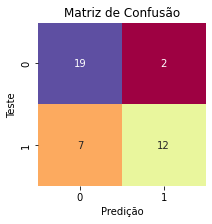

In [16]:
# Importando bibliotecas pra visualizar uma matriz de confusão para avaliar o modelo
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Verificando a matriz de confusão
cm = confusion_matrix(y_test,y_pred)

# Criando uma plotagem da matriz de confusão usando o seaborn e o matplotlib
plt.figure(figsize=(3, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Spectral", cbar=False)
plt.xlabel("Predição")
plt.ylabel("Teste")
plt.title("Matriz de Confusão")
plt.show()

In [17]:
# Calculando a acurácia do modelo
print(knn.score(X_test, y_test))

0.775


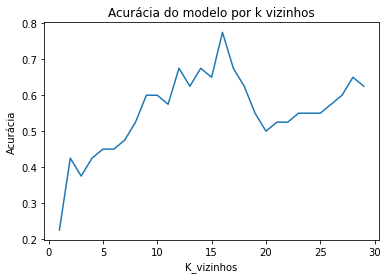

In [18]:
neighbors = np.arange(1, 30)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
# Laço de repetição sobre os K vizinhos
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train)
      
    # Obtém a acurácia do modelo
    test_accuracy[i] = knn.score(X_test, y_test)

# Configura a visualização dos dados  
plt.plot(neighbors, test_accuracy)
plt.title('Acurácia do modelo por k vizinhos')
plt.xlabel('K_vizinhos')
plt.ylabel('Acurácia')
plt.show()

#### Exercício 2: Elaborar um classificador KNN para classificar as duas fotos inéditas no conjunto de dados da FEI
- Elabora um classificador utilizando 100% das amostras do conjunto de dados da FEI para fazer o treinamento
- Utilize as duas imagens inétidas como teste
- Avalie os resultados

In [19]:
# Importa a imagem, converte em tons de cinza e em array
foto_neutra = np.array(Image.open('minha_foto_a.jpg').convert("L")).flatten()
foto_sorrindo = np.array(Image.open('minha_foto_b.jpg').convert("L")).flatten()

In [20]:
# Configura o conjunto de teste empilhando as imagens
dados_teste = np.vstack((foto_neutra, foto_neutra))
dados_teste.shape

(2, 93600)

In [21]:
# Cria o gabarito do conjunto de teste
gabarito_teste = np.array([0, 1])
gabarito_teste

array([0, 1])

In [22]:
# Verifica a dimensão dos conjutnos de treinamento e teste
print('Conunto de dados de treinamento:',dataset.shape)
print('      Conunto de dados de teste:',dados_teste.shape)
print('        Gabarito do treinamento:',gabarito.size)
print('              Gabarito do teste:',gabarito_teste.size)

Conunto de dados de treinamento: (200, 93600)
      Conunto de dados de teste: (2, 93600)
        Gabarito do treinamento: 200
              Gabarito do teste: 2


In [23]:
# Criando o classificador
knn = KNeighborsClassifier(n_neighbors=3)

In [24]:
# Fazendo o treinamento do modelo com a função fit
knn = knn.fit(dataset, gabarito)

In [25]:
# Fazemos a previsão com os dados de teste, ou seja, com os dados que o modelo não viu antes
y_pred = knn.predict(dados_teste)
print(y_pred)

[0. 0.]


In [26]:
# Calculando a acurácia do modelo
print(knn.score(dados_teste, gabarito_teste))

0.5
